In [125]:
#Realiza os imports necessários
import numpy  as  np
import pandas as  pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [126]:
#Lê dataset por meio do csv
data = pd.read_csv('precos_casa_california.csv')

In [127]:
#Imprime as primeiras n linhas do dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.25,37.85,52.0,919.0,,413.0,,4.0368,269700.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY


In [128]:
#Imprime todas as informações sobre o dataset como: tipos de coluna, valores não nulos e uso da memória.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20445 entries, 0 to 20444
Data columns (total 10 columns):
longitude             20445 non-null object
latitude              20445 non-null float64
housing_median_age    20445 non-null object
total_rooms           20445 non-null object
total_bedrooms        20241 non-null object
population            20445 non-null object
households            20445 non-null object
median_income         20444 non-null float64
median_house_value    20445 non-null object
ocean_proximity       20445 non-null object
dtypes: float64(2), object(8)
memory usage: 1.6+ MB


In [129]:
#Valores nulos do dataset são substituídos por NaN.
data = data.replace(' ',np.nan)

In [130]:
#Remova os valores ausentes (NaN).
data = data.dropna()

In [131]:
#Retorna as contagens de valores exclusivos da coluna ocean_proximity.
data['ocean_proximity'].value_counts()

<1H OCEAN     8968
INLAND        6465
NEAR OCEAN    2534
NEAR BAY      2242
ISLAND           5
Name: ocean_proximity, dtype: int64

In [132]:
#Mapea os campos da coluna ocean_proximity, associando um objeto a um valor (0 = mais proximo)
dicionario = {'NEAR BAY':0,'<1H OCEAN':1,'INLAND':2,'NEAR OCEAN':3,'ISLAND':4}

In [133]:
#Valores da coluna ocean_proximity do dataset são substituídos pelos valores do dicionario.
data = data.replace({"ocean_proximity":dicionario})

In [134]:
#Converte todo o dataset para tipo numerico
data = data.apply(pd.to_numeric)

In [135]:
#Gera estatísticas do dataset, como: contagem, media, min, max.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20214.0,-119.580610,2.001808,-124.3500,-121.80000,-118.51000,-118.0100,-1.143100e+02
latitude,20214.0,35.642652,2.129135,32.5400,33.94000,34.26000,37.7200,4.195000e+01
housing_median_age,20214.0,28.653804,13.591381,1.0000,18.00000,29.00000,37.0000,7.500000e+02
total_rooms,20214.0,2641.796972,2193.500286,2.0000,1449.00000,2127.00000,3150.0000,3.932000e+04
total_bedrooms,20214.0,538.529138,422.608123,1.0000,296.00000,435.00000,647.0000,6.445000e+03
population,20214.0,1425.575740,1135.425067,3.0000,786.25000,1166.00000,1723.7500,3.568200e+04
households,20214.0,499.948600,383.364626,1.0000,280.00000,409.00000,605.0000,6.082000e+03
median_income,20214.0,3.877064,1.902906,0.4999,2.56565,3.54215,4.7569,1.500010e+01
median_house_value,20214.0,211729.734491,643603.742457,0.0000,119800.00000,180550.00000,265300.0000,9.022130e+07
ocean_proximity,20214.0,1.460374,0.849996,0.0000,1.00000,1.00000,2.0000,4.000000e+00


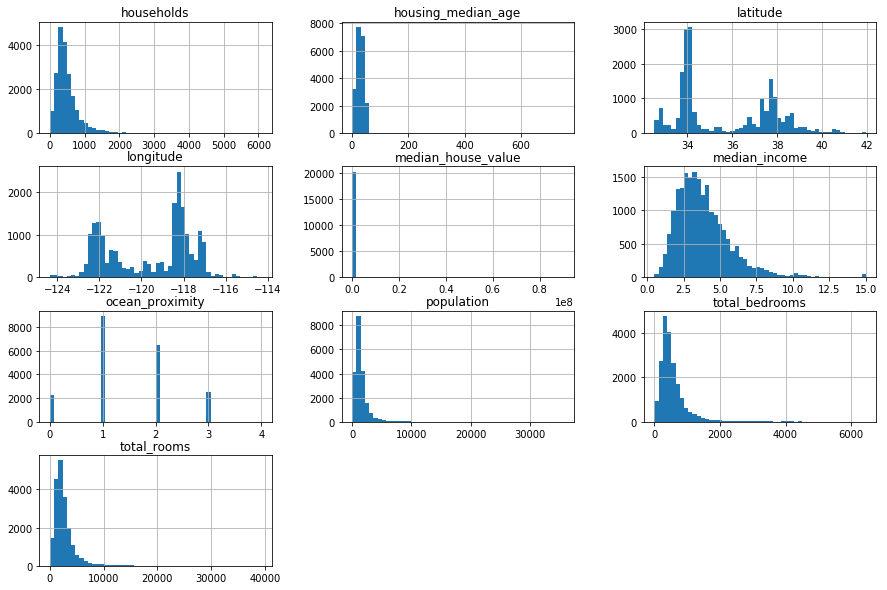

In [136]:
#Imprime um histograma (representação dos dados) do dataset
%matplotlib inline
data.hist(bins=50,figsize=(15,10))
plt.show()

In [137]:
#Preparando os dados de treinamento
data_labels = data['median_house_value']
data = data.drop('median_house_value',axis=1)

data_prepared = data
y_train = data_labels.copy()

In [138]:
#Treinando e Construindo Modelo de Decision Three

X_train, X_test, y_train, y_test = train_test_split(data_prepared, data_labels, test_size = 0.2, random_state = 7)

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print(score)

0.7453377250982773
